In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd_data = pd.read_csv('내국인출국교통수단별_20230302165039.csv', encoding='cp949', header=1)
pd_data_y = pd.read_csv('내국인출국교통수단별_20230302172218.csv', encoding='cp949', header=1)
pd_data_m = pd.read_csv('내국인출국교통수단별_20230302174035.csv', encoding='cp949', header=1)

pd_data.columns = ['시점','공항','항구']
pd_data_y.columns = ['시점','공항','항구']
pd_data_m.columns = ['시점','공항','항구']

pd_data_y
pd_data
pd_data_m

,시점,공항,항구
0,2015.01,226687,50545
1,2015.02,173950,44152
2,2015.03,175351,36822
3,2015.04,195851,46589
4,2015.05,199356,54680
...,...,...,...
91,2022.08,47261,3533
92,2022.09,37030,2682
93,2022.10,71579,3494
94,2022.11,126419,3687


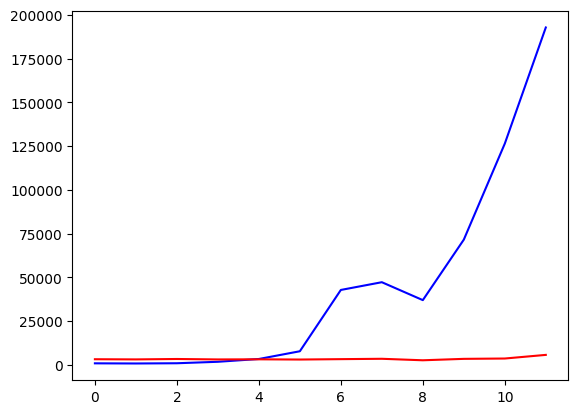

In [2]:
# 공항, 항구 년중 월별 출국 인원 plot
# normalization / standardization 적용, plot

# 2018부터 2022년까지 추이 보기

#- 2022년 연말 공항 이용객 증가하였음
#- 2022년 연말에 공항 출국 인원이 늘어난 것이 항구 출국인원에도 반영되었는가.
#- 연말에 출국인원이 증가하는 것이 일반적인 추이인가. --> 코로나 이전/이후 연도별 추이

# .sort_values()
# .sort_index()

_, axe = plt.subplots()
axe.plot(pd_data['공항'], color='blue')
axe.plot(pd_data['항구'], color='red')

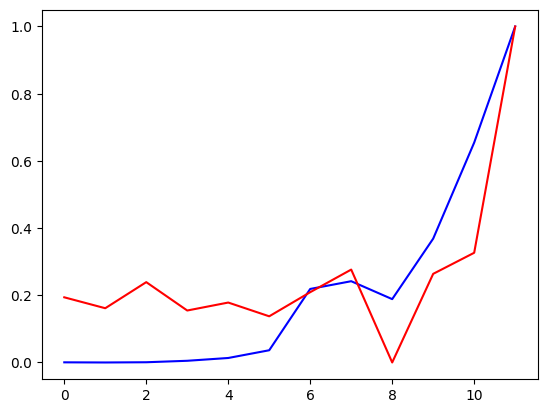

In [3]:
# normalization
def norm(pd_data,x):
    a_min = pd_data[x].min()
    a_max = pd_data[x].max()
    pd_data[x + '_norm'] = pd_data[x].apply(lambda x: (x-a_min)/(a_max-a_min))
    return pd_data[x + '_norm']

norm(pd_data,'공항')
norm(pd_data,'항구')

_, axe = plt.subplots()
axe.plot(norm(pd_data,'공항'), color='blue')
axe.plot(norm(pd_data,'항구'), color='red')

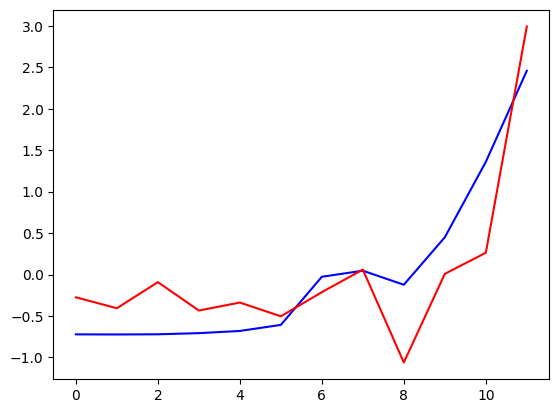

In [4]:
# standardization
def stda(pd_data,x):
    a_mean = pd_data[x].mean()
    a_std = pd_data[x].std()
    pd_data[x + '_std'] = pd_data[x].apply(lambda x: (x-a_mean)/a_std)
    return pd_data[x + '_std']

stda(pd_data,'공항')
stda(pd_data,'항구')

_, axe = plt.subplots()
axe.plot(stda(pd_data,'공항'), color='blue')
axe.plot(stda(pd_data,'항구'), color='red')

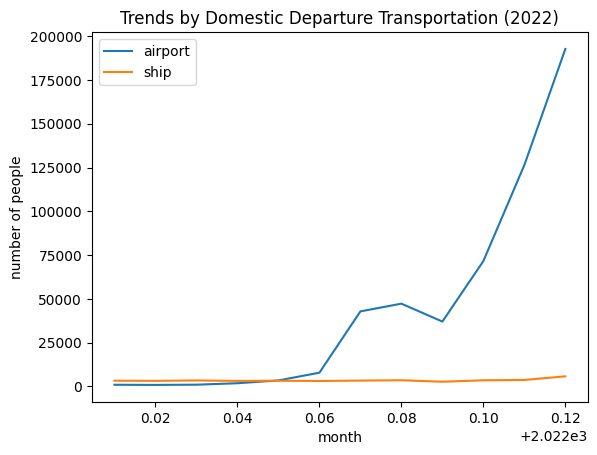

In [5]:
pd_data_2022 = pd_data.iloc[:12,:]
fig, ax = plt.subplots()
ax.plot(pd_data_2022['시점'], pd_data_2022['공항'], label='airport')
ax.plot(pd_data_2022['시점'], pd_data_2022['항구'], label='ship')
ax.legend()
ax.set_title('Trends by Domestic Departure Transportation (2022)')
ax.set_xlabel('month')
ax.set_ylabel('number of people')

plt.show()

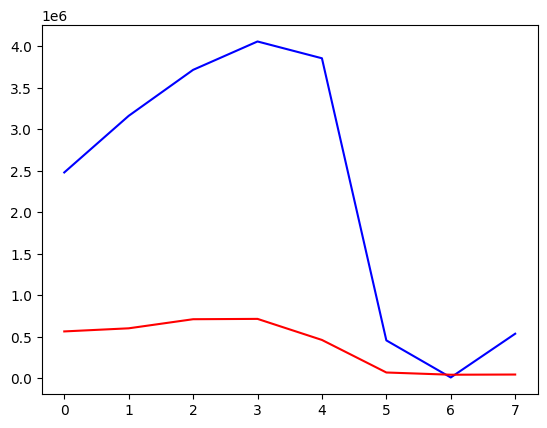

In [6]:
_, axe = plt.subplots()
axe.plot(pd_data_y['공항'], color='blue')
axe.plot(pd_data_y['항구'], color='red')

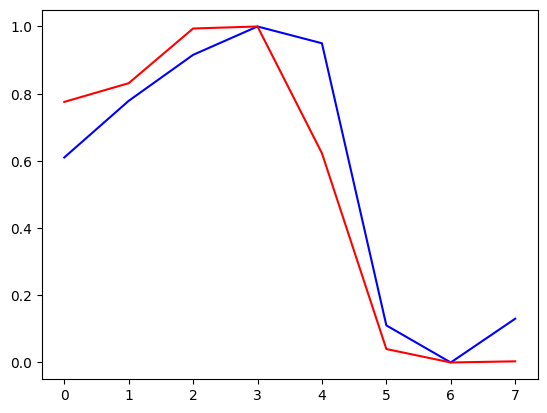

In [7]:
norm(pd_data_y,'공항')
norm(pd_data_y,'항구')

_, axe = plt.subplots()
axe.plot(norm(pd_data_y,'공항'), color='blue')
axe.plot(norm(pd_data_y,'항구'), color='red')

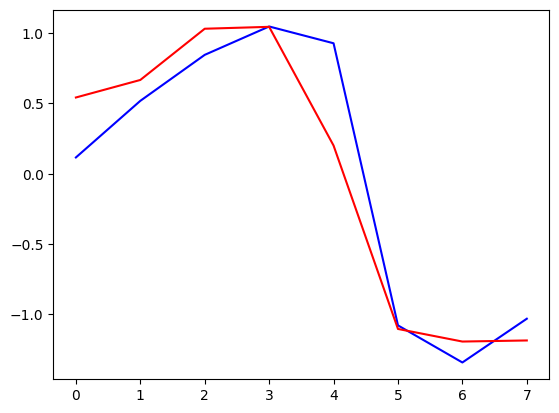

In [8]:
stda(pd_data_y,'공항')
stda(pd_data_y,'항구')

_, axe = plt.subplots()
axe.plot(stda(pd_data_y,'공항'), color='blue')
axe.plot(stda(pd_data_y,'항구'), color='red')

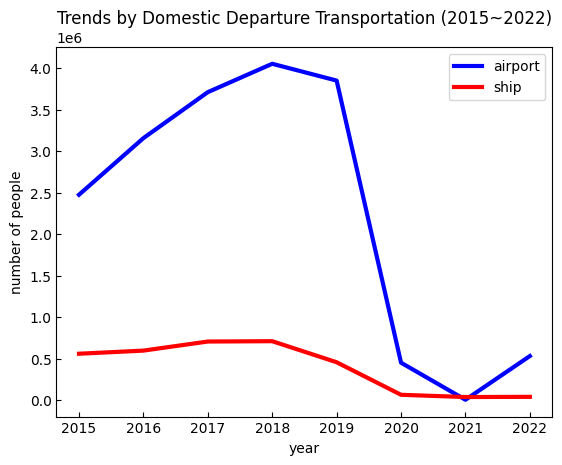

In [39]:
fig, ax = plt.subplots()
ax.plot(pd_data_y['시점'], pd_data_y['공항'], label='airport', color='blue', linestyle = '-',linewidth=3)
ax.plot(pd_data_y['시점'], pd_data_y['항구'], label='ship', color='red', linestyle = '-',linewidth=3)
ax.legend()
ax.set_title('Trends by Domestic Departure Transportation (2015~2022)')
ax.set_xlabel('year')
ax.set_ylabel('number of people')
ax.tick_params(axis='both', direction='in')


plt.show()

In [ ]:
pd_data_yearly = pd_data_m.groupby('연도').sum()

In [ ]:
pd_data_yearly.plot(kind='bar', y=['공항', '항구'], rot=0, figsize=(10,6))
plt.title('연도별 출국인원 추이')
plt.xlabel('연도')
plt.ylabel('출국인원')
plt.show()